In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm

In [3]:
# checking pep8 compliance
%load_ext pycodestyle_magic
%pycodestyle_on

In [4]:
d = pd.read_csv('p5_clean_V3.csv')
d.head(3)

,recency,more_than_one_item,volume_log,payment_credit_card,payment_value,payment_installments,review_score,product_main_category_art_leisure,product_main_category_auto,product_main_category_construction,product_main_category_diverse,product_main_category_electronics,product_main_category_fashion_accessories,product_main_category_food_drink,product_main_category_furniture,product_main_category_health_beauty,product_main_category_home_garden,product_main_category_kids_babies,product_main_category_sports
0,474,0,11.581864,1,146.87,2.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0
1,233,0,10.885585,1,335.48,8.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0
2,106,0,10.735723,1,157.73,7.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
d.shape

(92621, 19)

### Sampling

To speed up the computation, we will work on a sample of 10,000 customers.

In [6]:
X = d.sample(10000, random_state=21)

### Normalizing data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler().fit(d)

In [9]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [10]:
X_scaled.describe().round(2)

,recency,more_than_one_item,volume_log,payment_credit_card,payment_value,payment_installments,review_score,product_main_category_art_leisure,product_main_category_auto,product_main_category_construction,product_main_category_diverse,product_main_category_electronics,product_main_category_fashion_accessories,product_main_category_food_drink,product_main_category_furniture,product_main_category_health_beauty,product_main_category_home_garden,product_main_category_kids_babies,product_main_category_sports
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.02,-0.01,-0.01,0.00,-0.00,-0.02,-0.00,0.02,-0.01,-0.01,-0.01
std,1.01,1.01,0.99,1.00,1.00,1.01,1.01,1.05,1.04,0.98,0.97,1.00,1.00,0.92,1.00,1.02,0.99,0.98,0.99
min,-1.55,-0.33,-2.33,-1.76,-1.06,-1.10,-2.31,-0.14,-0.20,-0.14,-0.16,-0.44,-0.39,-0.10,-0.47,-0.38,-0.40,-0.27,-0.29
25%,-0.79,-0.33,-0.69,0.57,-0.61,-0.71,-0.07,-0.14,-0.20,-0.14,-0.16,-0.44,-0.39,-0.10,-0.47,-0.38,-0.40,-0.27,-0.29
50%,-0.12,-0.33,-0.06,0.57,-0.30,-0.32,0.68,-0.14,-0.20,-0.14,-0.16,-0.44,-0.39,-0.10,-0.47,-0.38,-0.40,-0.27,-0.29
75%,0.74,-0.33,0.75,0.57,0.24,0.45,0.68,-0.14,-0.20,-0.14,-0.16,-0.44,-0.39,-0.10,-0.47,-0.38,-0.40,-0.27,-0.29
max,2.97,3.05,2.89,0.57,6.42,2.79,0.68,7.21,4.90,7.10,6.10,2.26,2.59,9.90,2.12,2.66,2.51,3.66,3.42


### Principal Component Analysis

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=X.shape[1])
X_proj = pca.fit_transform(X_scaled)

PCS = pd.DataFrame(pca.components_, columns=X.columns).T

var_ex = pca.explained_variance_ratio_*100

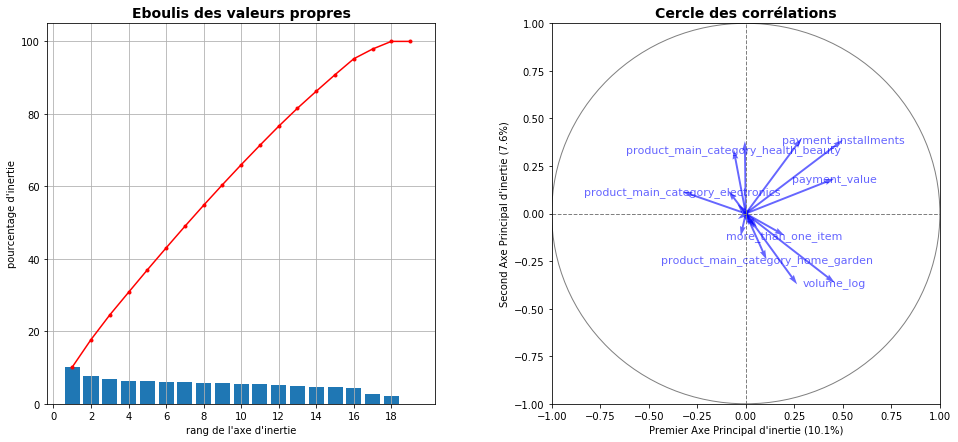

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].bar(np.arange(len(var_ex))+1, var_ex)
ax[0].plot(np.arange(len(var_ex))+1, var_ex.cumsum(), '.-', c="red")
ax[0].set_xticks(range(0, X_proj.shape[1]+1, 2))
ax[0].set_xlabel("rang de l'axe d'inertie")
ax[0].set_ylabel("pourcentage d'inertie")
ax[0].set_title("Eboulis des valeurs propres", fontsize=14, weight='bold')
ax[0].grid()

ax[1].set_title('Cercle des corrélations', fontsize=14, weight='bold')
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='grey')
plt.gca().add_artist(circle)
ax[1].quiver(np.zeros(PCS.shape[0]), np.zeros(PCS.shape[0]), PCS[0], PCS[1],
             angles='xy', scale_units='xy', scale=1,
             color="b", width=0.005, alpha=0.6)

main_comp = (abs(PCS[0]) + abs(PCS[1])).sort_values(ascending=False)
for index in main_comp.index[[0, 1, 3, 5, 6, 8, 9]]:
    ax[1].text(PCS.loc[index, 0], PCS.loc[index, 1], index, fontsize='11',
               ha='center', va='center', rotation=0, color="blue", alpha=0.6)

ax[1].plot([-1, 1], [0, 0], color='grey', ls='--', linewidth=1)
ax[1].plot([0, 0], [-1, 1], color='grey', ls='--', linewidth=1)
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('Premier Axe Principal d\'inertie ({}%)'
                 .format(round(100*pca.explained_variance_ratio_[0], 1)))
ax[1].set_ylabel('Second Axe Principal d\'inertie ({}%)'
                 .format(round(100*pca.explained_variance_ratio_[1], 1)))

fig.subplots_adjust(wspace=0.3)
plt.show()

### t-SNE projection

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(X_scaled)

### Visualization of the normalized sample on 2 dimensions

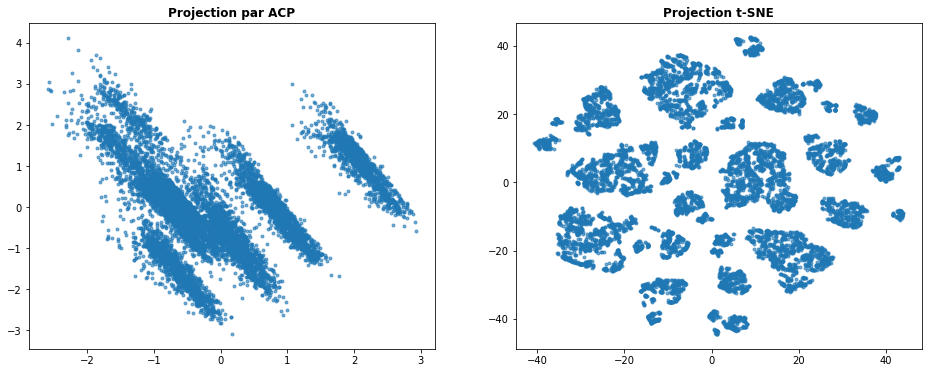

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_proj[:, 3], X_proj[:, 4], alpha=0.6, marker='.')
ax[0].set_title('Projection par ACP', fontsize=12, weight='bold')
ax[1].scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6, marker='.')
ax[1].set_title('Projection t-SNE', fontsize=12, weight='bold')
plt.show()

## 1. Hierarchical Clustering

This method consists in aggregating individual points or groups of points progressively until they form a single cluster. The dendrogram graph allows us to determine the optimal number of clusters.

### A) Optimal number of clusters

In [15]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score

3:80: E501 line too long (85 > 79 characters)


In [16]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [17]:
''' We don't specify the distance neither the number of clusters 
as we want to aggregate all the points''' 

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                linkage='ward')
model = model.fit(X_scaled)

1:80: E501 line too long (101 > 79 characters)


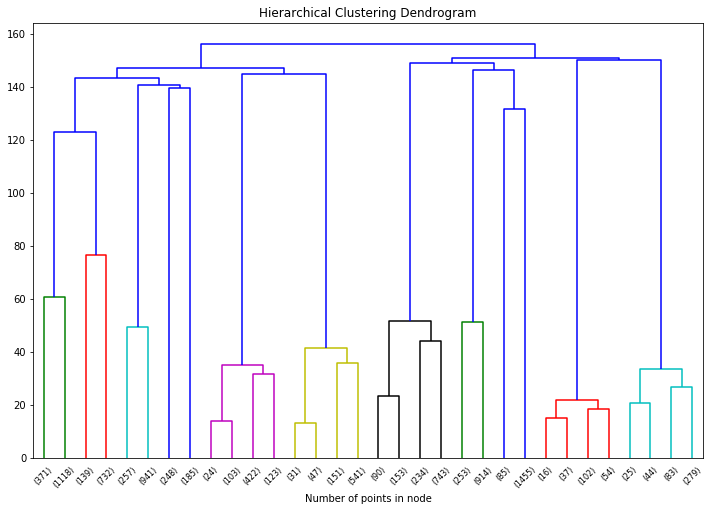

In [18]:
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top four levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node")
plt.show()

We count 13 clusters

In [19]:
n_clus = 13

In [20]:
model = AgglomerativeClustering(n_clusters=n_clus)
AGlabels = model.fit_predict(X_scaled)

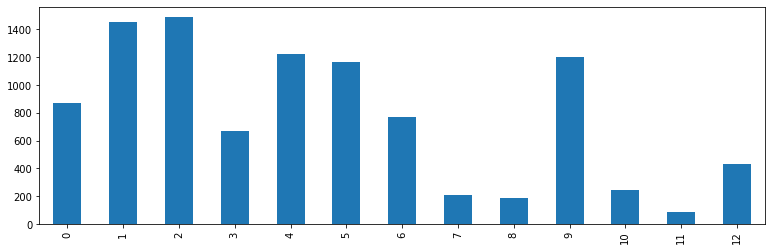

In [21]:
# Distribution of customers in clusters
pd.Series(AGlabels).value_counts().sort_index().plot.bar(figsize=(n_clus, 4))

### B) Silhouette coefficient

In [22]:
silhouette_avg = silhouette_score(X_scaled, AGlabels)
sample_silhouette_values = silhouette_samples(X_scaled, AGlabels)

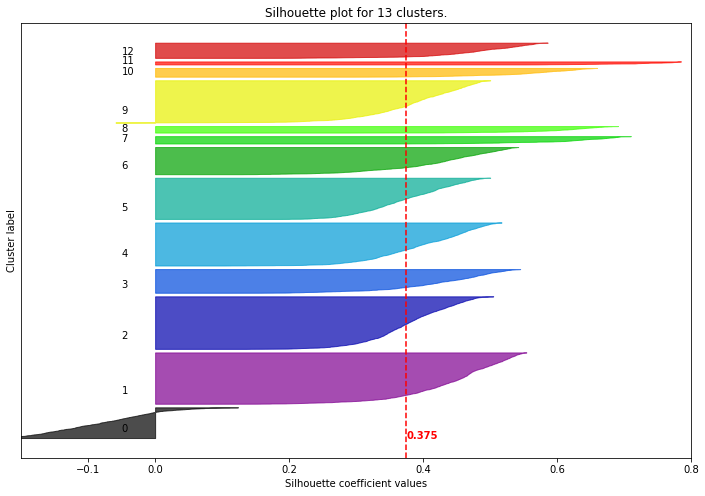

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlim([-0.2, 0.8])

y_lower = 10
for i in range(n_clus):
    # Aggreg and sort the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[AGlabels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clus)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.2 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 100

ax1.set_title("Silhouette plot for {} clusters.".format(n_clus))
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.text(x=silhouette_avg, y=-10, s=round(silhouette_avg, 3),
         color='red', weight='bold')

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
plt.show()

### C) Projection of clusters in 2 dimensions

In [24]:
acp = pd.concat([pd.DataFrame(X_proj[:, 3:5]), pd.Series(AGlabels)], axis=1)
acp.columns = [0, 1, 'Cluster']
tsne = pd.concat([pd.DataFrame(tsne_results), pd.Series(AGlabels)], axis=1)
tsne.columns = [0, 1, 'Cluster']

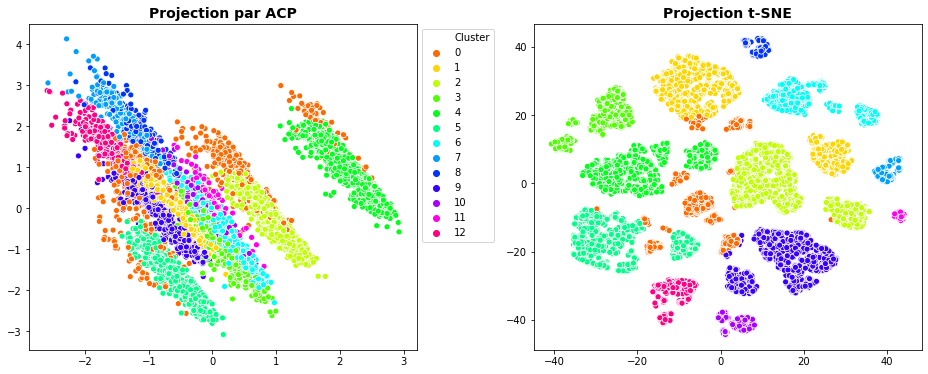

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=0, y=1, hue='Cluster', data=acp, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[0])
sns.scatterplot(x=0, y=1, hue='Cluster', data=tsne, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[1])

ax[0].set_title('Projection par ACP', fontsize=14, weight='bold')
ax[1].set_title('Projection t-SNE', fontsize=14, weight='bold')

ax[0].legend(bbox_to_anchor=(1, 1))
ax[1].legend_.remove()
for i in range(2):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.subplots_adjust(wspace=0.3)
plt.show()

### D) Saving results

In [26]:
results = pd.DataFrame(np.zeros([2, 3]),
                       index=['NB of Clusters', 'Silhouette Score'],
                       columns=['Hierarchical', 'K-means', 'DB Scan'])
results['Hierarchical'] = [n_clus, round(silhouette_avg, 3)]
results

,Hierarchical,K-means,DB Scan
NB of Clusters,13.000,0.0,0.0
Silhouette Score,0.375,0.0,0.0


## 2. K-means clustering

The K-means algorithm initializes the cluster centers randomly. We will calculate the average silhouette coefficient of the clusters by varying this random parameter and then plot the mean of the calculated coefficients for each number of clusters.

In [27]:
from sklearn.cluster import KMeans

### A) Optimal number of clusters

In [28]:
from random import randrange

seeds = []
for i in range(5):
    seeds.append(randrange(1000))
seeds

[805, 787, 876, 969, 539]

In [29]:
n_iter = 5

inerties = np.zeros([n_iter, 15])
silhouettes = np.zeros([n_iter, 15])

for i in range(n_iter):
    for n_cluster in range(5, 20):
        cls = KMeans(n_clusters=n_cluster, n_init=10, random_state=seeds[i])
        cls.fit(X_scaled)
        silhouettes[i, n_cluster-5] = silhouette_score(X_scaled, cls.labels_)
        inerties[i, n_cluster-5] = cls.inertia_

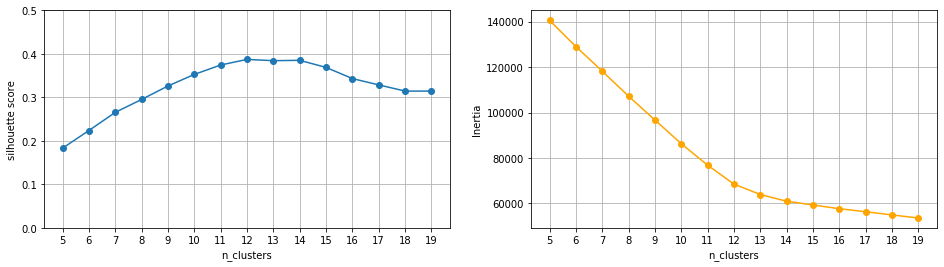

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(range(5, 20), silhouettes.mean(axis=0), marker='o')
ax[0].set_ylim(0, 0.5)
ax[0].set_xticks(range(5, 20))
ax[0].set_xlabel('n_clusters')
ax[0].set_ylabel('silhouette score')
ax[0].grid()

ax[1].plot(range(5, 20), inerties.mean(axis=0), marker='o', color='orange')
ax[1].set_xticks(range(5, 20))
ax[1].set_xlabel('n_clusters')
ax[1].set_ylabel('Inertia')
ax[1].grid()
plt.show()

In [31]:
n_iter = 5

silhouettes = np.zeros([n_iter, 15])

for i in range(n_iter):
    for n_cluster in range(5, 20):
        cls = KMeans(n_clusters=n_cluster, n_init=10, random_state=seeds[i])
        cls.fit(X_scaled)
        silhouettes[i, n_cluster-5] = silhouette_score(X_scaled, cls.labels_)

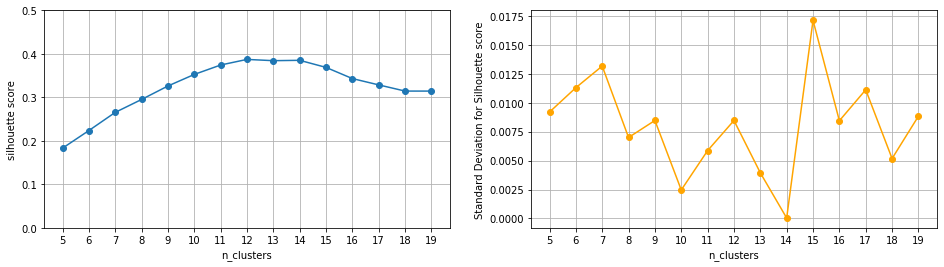

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(range(5, 20), silhouettes.mean(axis=0), marker='o')
ax[0].set_ylim(0, 0.5)
ax[0].set_xticks(range(5, 20))
ax[0].set_xlabel('n_clusters')
ax[0].set_ylabel('silhouette score')
ax[0].grid()

ax[1].plot(range(5, 20), silhouettes.std(axis=0), marker='o', color='orange')
ax[1].set_xticks(range(5, 20))
ax[1].set_xlabel('n_clusters')
ax[1].set_ylabel('Standard Deviation for Silhouette score')
ax[1].grid()
plt.show()

The average silhouette score seems to reach the maximal value for n=12 clusters

In [33]:
n_clus = 12

In [34]:
k_means = KMeans(n_clusters=n_clus, random_state=21, n_init=10)
k_means.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

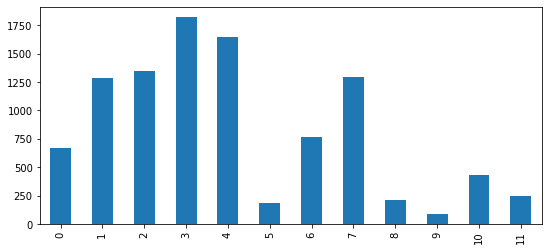

In [35]:
# Distribution of the customers
pd.Series(k_means.labels_).value_counts().sort_index().plot.bar(figsize=(9, 4))

### B) Silhouette coefficient

In [35]:
cluster_labels = k_means.labels_

In [36]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

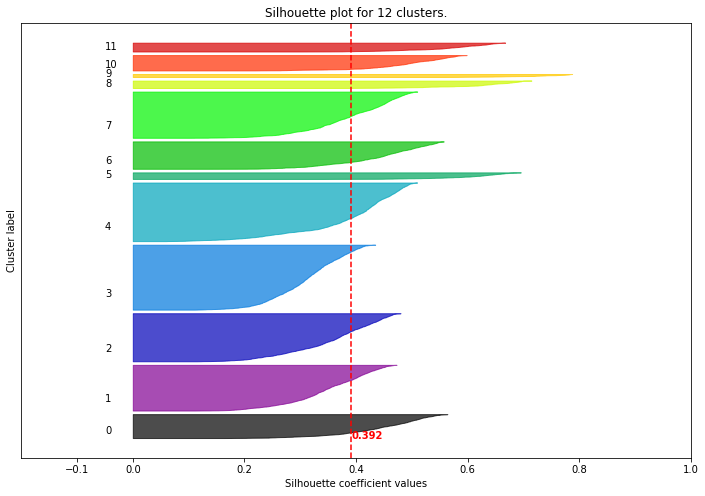

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlim([-0.2, 1])

y_lower = 10
for i in range(n_clus):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_clus_sil_values = sample_silhouette_values[cluster_labels == i]
    ith_clus_sil_values.sort()
    size_cluster_i = ith_clus_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clus)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_clus_sil_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.2 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 100

ax1.set_title("Silhouette plot for {} clusters.".format(n_clus))
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.text(x=silhouette_avg, y=-10, s=round(silhouette_avg, 3),
         color='red', weight='bold')

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### C) Projection of clusters in 2 dimensions

In [38]:
acp = pd.concat([pd.DataFrame(X_proj[:, 3:5]),
                 pd.Series(cluster_labels)], axis=1)
acp.columns = [0, 1, 'Cluster']

tsne = pd.concat([pd.DataFrame(tsne_results),
                  pd.Series(cluster_labels)], axis=1)
tsne.columns = [0, 1, 'Cluster']

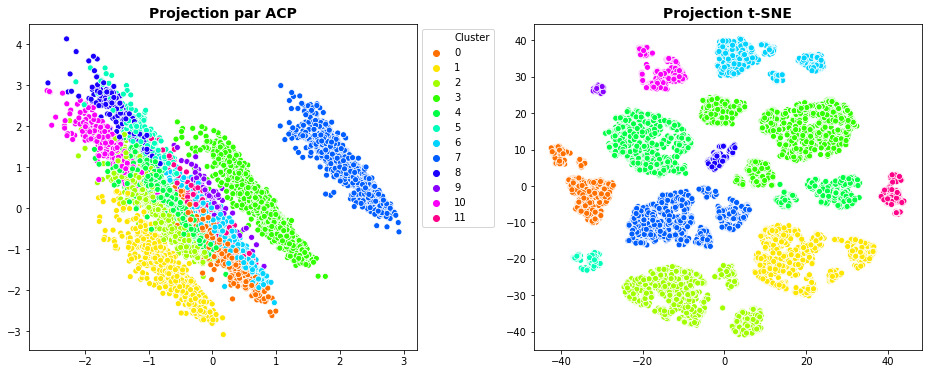

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=0, y=1, hue='Cluster', data=acp, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[0])
sns.scatterplot(x=0, y=1, hue='Cluster', data=tsne, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[1])

ax[0].set_title('Projection par ACP', fontsize=14, weight='bold')
ax[1].set_title('Projection t-SNE', fontsize=14, weight='bold')

ax[0].legend(bbox_to_anchor=(1, 1))
ax[1].legend_.remove()
for i in range(2):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.subplots_adjust(wspace=0.3)
plt.show()

### D) Saving the results

In [40]:
results['K-means'] = [n_clus, round(silhouette_avg, 3)]
results

,Hierarchical,K-means,DB Scan
NB of Clusters,13.000,12.000,0.0
Silhouette Score,0.375,0.392,0.0


## 3. Density-based Clustering (DBSCAN)

In [41]:
from sklearn.cluster import DBSCAN

### A) Optimal distance

In [42]:
N_clusters = []
Noise = []
Sil_score = []
for dist in np.arange(1, 4, 0.2):
    db = DBSCAN(eps=dist, min_samples=100, algorithm='kd_tree', n_jobs=-1)
    db.fit(X_scaled)
    n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    n_noise_ = list(db.labels_).count(-1)
    N_clusters.append(n_clusters_)
    Noise.append(n_noise_/X_scaled.shape[0])
    Sil_score.append((silhouette_score(X_scaled, db.labels_)
                      if n_clusters_ > 1 else 0))

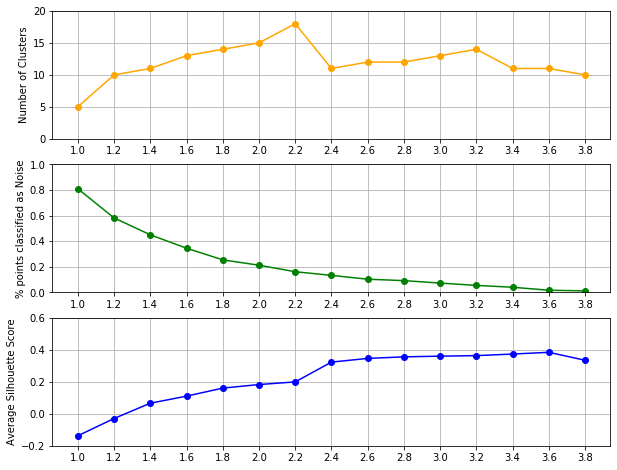

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(np.arange(1, 4, 0.2), N_clusters, marker='o', c='orange')
ax[1].plot(np.arange(1, 4, 0.2), Noise, marker='o', c='green')
ax[2].plot(np.arange(1, 4, 0.2), Sil_score, marker='o', c='blue')

for i in range(3):
    ax[i].grid()
    ax[i].set_xticks(np.arange(1, 4, 0.2))
ax[0].set_ylim(0, 20)
ax[0].set_ylabel('Number of Clusters')
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('% points classified as Noise')
ax[2].set_ylim(-0.2, 0.6)
ax[2].set_ylabel('Average Silhouette Score')

plt.show()

The silhouette score seems maximal for epislon=3.6

In [44]:
db = DBSCAN(eps=3.6, min_samples=100, algorithm='kd_tree', n_jobs=-1)
db.fit(X_scaled)

DBSCAN(algorithm='kd_tree', eps=3.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)

In [45]:
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print('Nb of clusters:', n_clusters_,
      '\nNoise Ratio : {}%'.format(100*n_noise_/X_scaled.shape[0]))

Nb of clusters: 11 
Noise Ratio : 1.62%


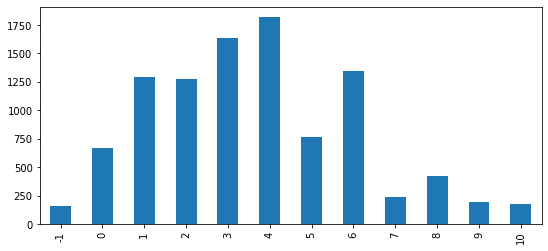

In [46]:
# Répartition des clients dans les clusters
pd.Series(db.labels_).value_counts().sort_index().plot.bar(figsize=(9, 4))

### B) Silhouette coefficient

In [47]:
cluster_labels = db.labels_
n_clus = len(set(db.labels_))

In [48]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

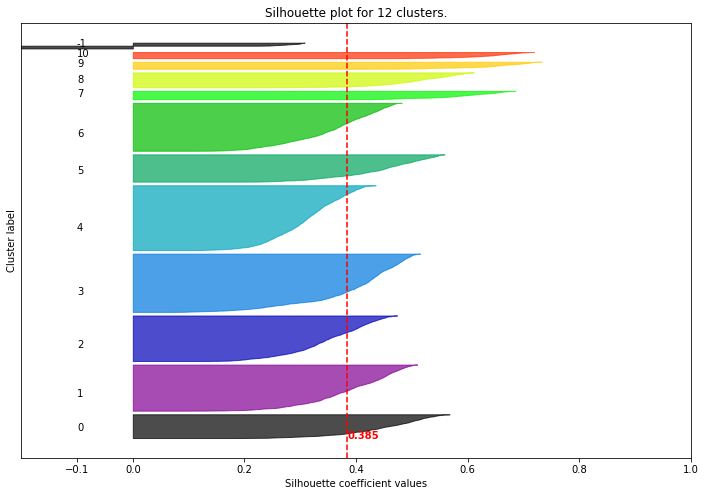

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlim([-0.2, 1])

y_lower = 10
for i in list(set(db.labels_)):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_clus_sil_values = sample_silhouette_values[cluster_labels == i]
    ith_clus_sil_values.sort()
    size_cluster_i = ith_clus_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clus)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_clus_sil_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.1, y_lower + 0.3 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 100

ax1.set_title("Silhouette plot for {} clusters.".format(n_clus))
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.text(x=silhouette_avg, y=-10, s=round(silhouette_avg, 3),
         color='red', weight='bold')

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### C) Projection of clusters in 2 dimensions

In [50]:
acp = pd.concat([pd.DataFrame(X_proj[:, 3:5]),
                 pd.Series(cluster_labels)], axis=1)
tsne = pd.concat([pd.DataFrame(tsne_results),
                  pd.Series(cluster_labels)], axis=1)
acp.columns = [0, 1, 'Cluster']
tsne.columns = [0, 1, 'Cluster']

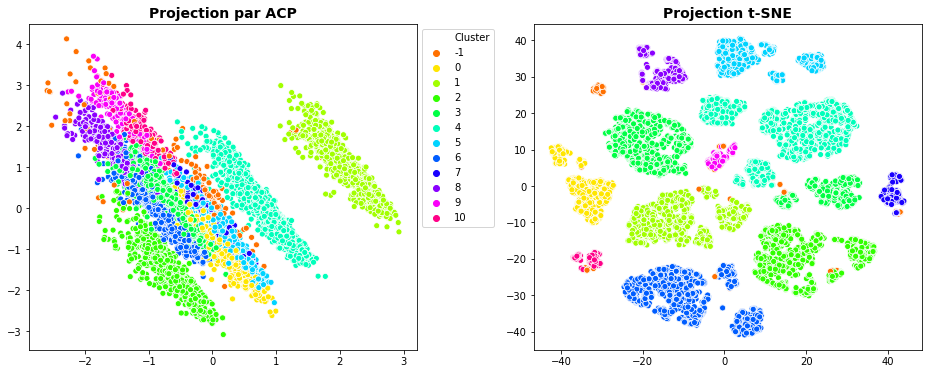

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=0, y=1, hue='Cluster', data=acp, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[0])
sns.scatterplot(x=0, y=1, hue='Cluster', data=tsne, legend='full',
                palette=sns.color_palette("hsv", n_clus), ax=ax[1])
ax[0].set_title('Projection par ACP', fontsize=14, weight='bold')
ax[1].set_title('Projection t-SNE', fontsize=14, weight='bold')

ax[0].legend(bbox_to_anchor=(1, 1))
ax[1].legend_.remove()
for i in range(2):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.subplots_adjust(wspace=0.3)
plt.show()

### D) Saving results

In [52]:
results['DB Scan'] = [n_clus, round(silhouette_avg, 3)]
results

,Hierarchical,K-means,DB Scan
NB of Clusters,13.000,12.000,12.000
Silhouette Score,0.375,0.392,0.385


## 4. Model comparison

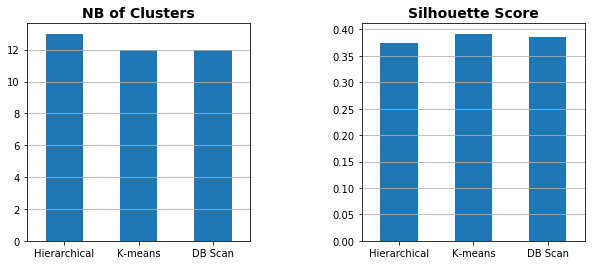

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    results.iloc[i].plot.bar(ax=ax[i])
    ax[i].tick_params('x', labelrotation=0)
    ax[i].grid(axis='y')
    ax[i].set_title(results.index[i], fontsize=14, weight='bold')
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Conclusion : K-Means provides the best silhouette coefficient

## 5. Exploration of clusters provided by K-Means

In [54]:
X_K = X.copy()
X_K['Cluster'] = k_means.labels_
X_ClusK = X_K.groupby('Cluster').mean()
X_ClusK

,recency,more_than_one_item,volume_log,payment_credit_card,payment_value,payment_installments,review_score,product_main_category_art_leisure,product_main_category_auto,product_main_category_construction,product_main_category_diverse,product_main_category_electronics,product_main_category_fashion_accessories,product_main_category_food_drink,product_main_category_furniture,product_main_category_health_beauty,product_main_category_home_garden,product_main_category_kids_babies,product_main_category_sports
Cluster,,,,,,,,,,,,,,,,,,,
0,261.732143,0.059524,9.313347,0.785714,139.750551,2.751488,4.133929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,254.240842,0.055339,8.317633,0.783320,169.152837,3.314108,4.175370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,239.400000,0.120741,9.437054,0.761481,134.341222,2.842222,4.113333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,261.103127,0.173889,9.477237,0.759737,142.240055,3.260011,3.925946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,249.972053,0.084447,8.016841,0.710814,123.396920,2.156136,4.032807,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,150.151351,0.129730,9.027275,0.691892,169.802000,2.772973,4.032432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,260.588312,0.101299,8.984521,0.744156,132.521481,2.305195,4.103896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,240.276579,0.060092,8.397082,0.770416,147.548952,3.076271,4.218028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,200.574163,0.062201,8.531339,0.746411,136.596603,2.669856,4.325359,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### General characteristics

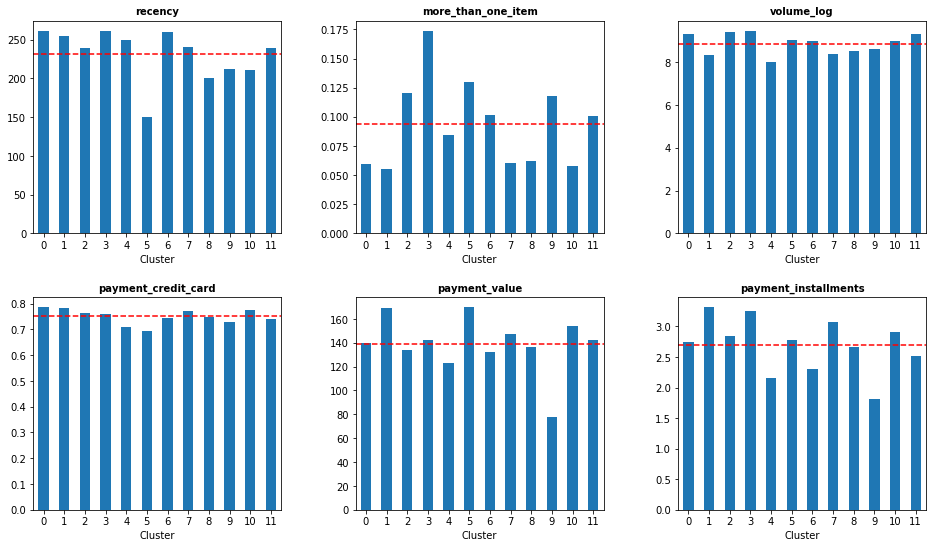

In [55]:
fig = plt.figure(figsize=(16, 9))
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    X_ClusK.iloc[:, i].plot.bar()
    ax.tick_params('x', labelrotation=0)
    ax.set_title(X_ClusK.columns[i], fontsize=10, weight='bold')
    plt.axhline(X_ClusK.iloc[:, i].mean(), color='red', ls='--')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Categories of purchased products for each cluster

In [56]:
labels = ['art_leisure', 'auto', 'construction', 'diverse',
          'electronics', 'fashion_accessories', 'food_drink', 'furniture',
          'health_beauty', 'home_garden', 'kids_babies', 'sports']

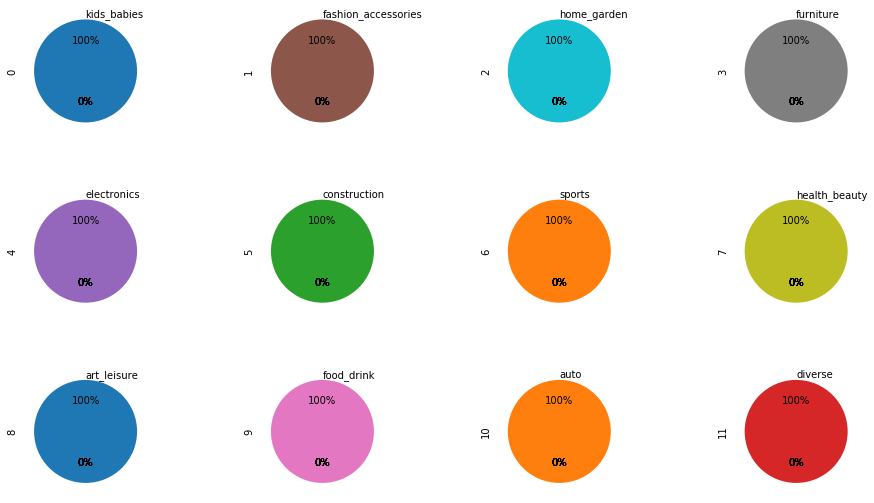

In [57]:
fig = plt.figure(figsize=(16, 9))
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1)
    X_ClusK.iloc[i, 7::].plot.pie(startangle=-90,
                                  labels=labels, autopct='%1.0f%%')
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Clusters correspond basically to customers purchasing the same product categories.

## 6. Cluster stability over time

In [12]:
# Sort clients per recency parameter
d_sorted = d.sort_values('recency')

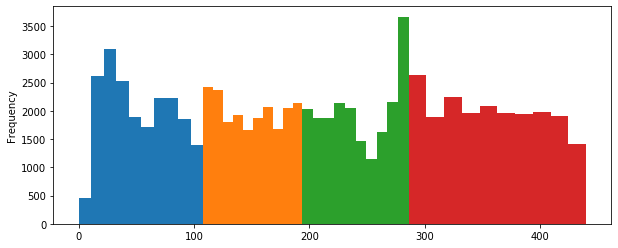

In [13]:
# Split the 4 quartiles of this distribution
q1 = d_sorted[0:20000].copy()
q2 = d_sorted[20000:40000].copy()
q3 = d_sorted[40000:60000].copy()
q4 = d_sorted[60000:80000].copy()
plt.figure(figsize=(10, 4))
q1.recency.plot.hist(bins=10)
q2.recency.plot.hist(bins=10)
q3.recency.plot.hist(bins=10)
q4.recency.plot.hist(bins=10)
plt.show()

Each group represents a purchase period of approximately 100 days (3 months).

In [14]:
# We normalize each group with the same scaler
sample1 = pd.DataFrame(scaler.transform(q1), columns=d.columns)
sample2 = pd.DataFrame(scaler.transform(q2), columns=d.columns)
sample3 = pd.DataFrame(scaler.transform(q3), columns=d.columns)
sample4 = pd.DataFrame(scaler.transform(q4), columns=d.columns)

In [15]:
# Reference cluster = cluster 1
k_means = KMeans(n_clusters=12, random_state=21, n_init=20)
k_means.fit(sample1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [16]:
# Assignment of the reference cluster to the other groups
for q, sample in [(q1, sample1), (q2, sample2), (q3, sample3), (q4, sample4)]:
    q.loc[:, 'cluster_ref'] = k_means.predict(sample)

In [17]:
# Assignment of a cluster to each group considered individually
for q, sample in [(q2, sample2), (q3, sample3), (q4, sample4)]:
    k_means.fit(sample)
    q.loc[:, 'cluster_true'] = k_means.predict(sample)

In [18]:
# Calculation of cluster stability with the adjusted Rand score
for q in [q2, q3, q4]:
    print(adjusted_rand_score(q['cluster_ref'], q['cluster_true']))

1.0
1.0
0.8898757161263602


For groups q2 and q3, the partitioning is the same; for group q4 the clusters were formed differently.

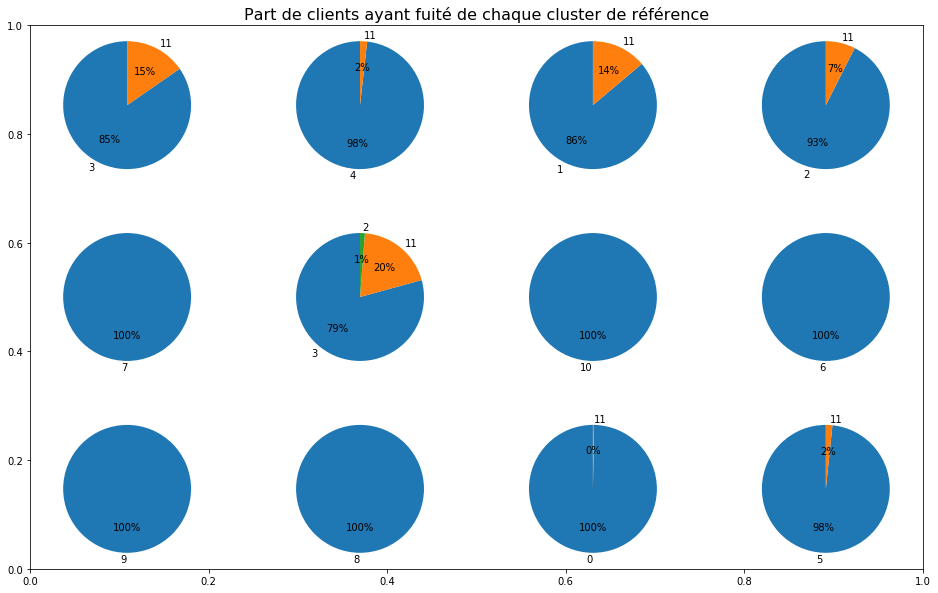

In [69]:
# Share of q4 customers who leaked from reference clustering, for each cluster
fig = plt.figure(figsize=(16, 10))
plt.title('Part de clients ayant fuité de chaque cluster de référence',
          fontsize=16)
for i in range(n_clus):
    ax = fig.add_subplot(3, 4, i+1)
    q4[q4['cluster_ref'] == i]['cluster_true']\
        .value_counts().plot.pie(autopct='%1.0f%%', startangle=90)
    ax.set_ylabel('')
plt.show()

### Exploring the new clusters

In [70]:
q4_clus = q4.groupby('cluster_true').mean()
q4_clus

,recency,more_than_one_item,volume_log,payment_credit_card,payment_value,payment_installments,review_score,product_main_category_art_leisure,product_main_category_auto,product_main_category_construction,product_main_category_diverse,product_main_category_electronics,product_main_category_fashion_accessories,product_main_category_food_drink,product_main_category_furniture,product_main_category_health_beauty,product_main_category_home_garden,product_main_category_kids_babies,product_main_category_sports,cluster_ref
cluster_true,,,,,,,,,,,,,,,,,,,,
0,357.055184,0.089186,9.042437,0.735229,125.767174,2.521182,4.310479,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,10.000000
1,361.479487,0.000000,9.544546,0.740598,117.769321,2.751709,4.239744,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,2.000000
2,357.082575,0.015642,7.940700,0.694071,110.382037,2.261550,4.180429,0.0,0.0,0.000728,0.0,0.999272,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.001455
3,360.591130,0.000000,9.584733,0.759371,128.786572,3.403147,4.131617,0.0,0.0,0.037196,0.0,0.000000,0.000000,0.0,0.962804,0.000000,0.000000,0.0,0.000000,0.185980
4,356.673527,0.043966,8.436742,0.757250,131.027956,3.007016,4.223573,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
5,356.666557,0.042834,8.484514,0.761120,174.808013,3.247776,4.236903,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,11.000000
6,362.918415,0.109557,9.308589,0.731935,148.737319,2.983683,4.151515,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,7.000000
7,355.541156,0.053707,9.498887,0.757151,147.385015,2.938704,4.266200,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,4.000000
8,363.069597,0.062271,8.562342,0.695971,171.988315,3.230769,4.227106,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.000000


### General characteristics

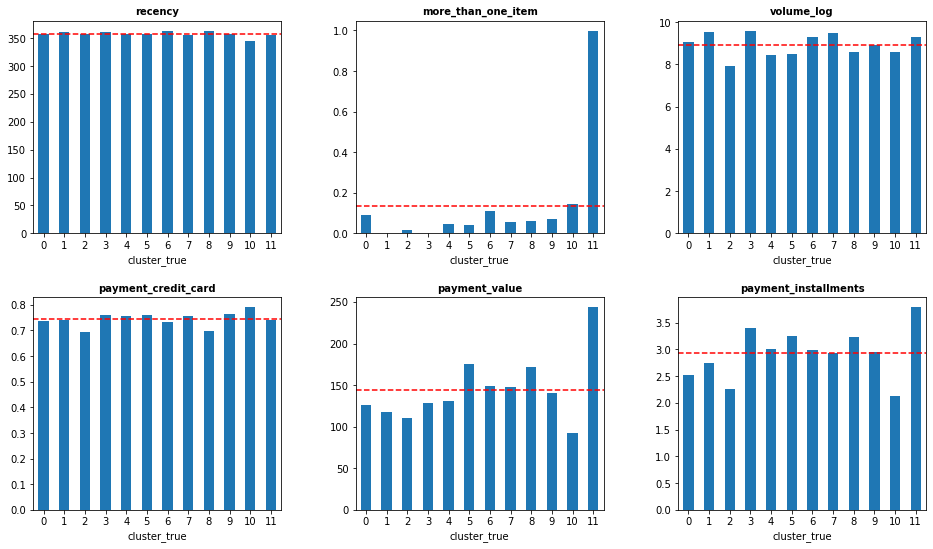

In [71]:
fig = plt.figure(figsize=(16, 9))
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    q4_clus.iloc[:, i].plot.bar()
    ax.tick_params('x', labelrotation=0)
    ax.set_title(q4_clus.columns[i], fontsize=10, weight='bold')
    plt.axhline(q4_clus.iloc[:, i].mean(), color='red', ls='--')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Cluster 11 consists of customers who have purchased more than 1 product

### Product categories in the new clustering

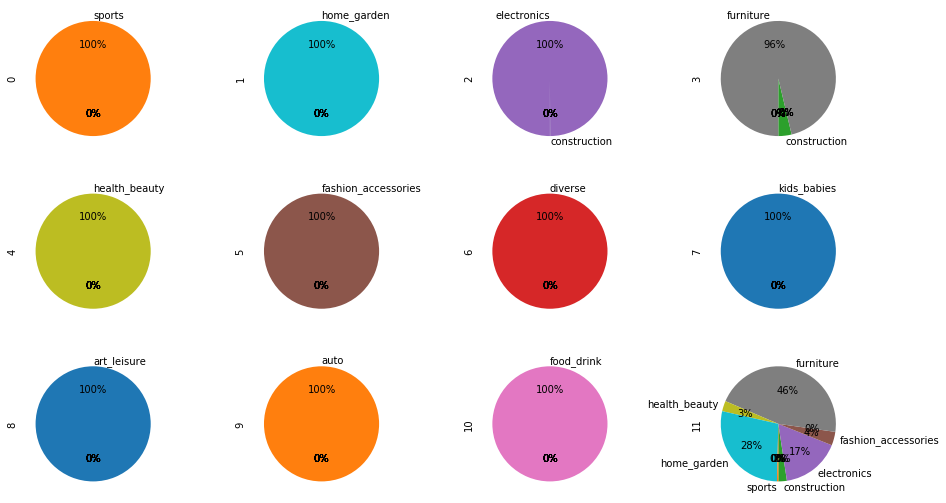

In [72]:
fig = plt.figure(figsize=(16, 9))
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1)
    q4_clus.iloc[i, 7:19].plot.pie(startangle=-90, labels=labels,
                                   autopct='%1.0f%%')
fig.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

The cluster specific to 'construction' type purchases has been spread over 3 clusters